## Python Tutorial on 2D DFT using 2D FFT Algorithm for Image Processing Applications

In [1]:
# from __future__ import division             # forces floating point division 
import numpy as np                          # Numerical Python 
import matplotlib.pyplot as plt             # Python plotting
from PIL import Image                       # Python Imaging Library
import matplotlib.image as image
from numpy.fft import fft2, fftshift, ifft2          # Python DFT
# Show plots in the notebook (don't use it in Python scripts)
%matplotlib inline 

## 2D Discrete Fourier Transform with Numpy library

First we will see how to find 2d Discrete Fourier Transform using Numpy. Numpy has an FFT package to do this. np.fft.fft2() provides us the frequency transform which will be a complex array. Its first argument is the input image, which is grayscale.
Second argument is optional which decides the size of output array. If it is greater than size of input image, input image is padded with zeros before calculation of FFT. If it is less than input image, input image will be cropped. If no arguments passed, Output array size will be same as input.
Now once you got the result, zero frequency component (DC component) will be at top left corner. If you want to bring it to center, you need to shift the result by N2 in both the directions. This is simply done by the function, np.fft.fftshift(). (It is more easier to analyze). Once you found the frequency transform, you can find the magnitude spectrum.
Example of 2D FFT Algorithm


https://www.unioviedo.es/compnum/labs/PYTHON/lab06_Fourier2D.html
https://www.unioviedo.es/compnum/labs/lab06_applications/lab06_applications.html#9
We start creating a periodic image of size (601,1201). The period, 10.5, is in the horizontal direction. In the vertical direction the image is constant:


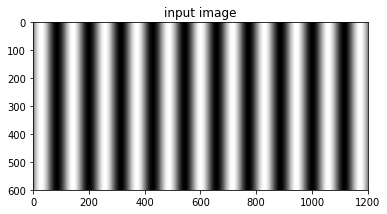

601 1201


In [2]:
hW, hH = 600, 300
hFreq = 10.5

# Mesh on the square [0,1)x[0,1)
x = np.linspace( 0, 2*hW/(2*hW +1), 2*hW+1)     # columns (Width)
y = np.linspace( 0, 2*hH/(2*hH +1), 2*hH+1)     # rows (Height)

[X,Y] = np.meshgrid(x,y)
A = np.sin(hFreq*2*np.pi*X)

# plt.imshow(A)
plt.imshow(A, cmap = 'gray');
plt.title('input image')
plt.show()
H,W = np.shape(A)
print(H,W)

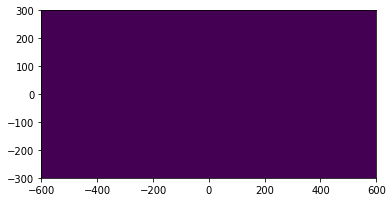

In [3]:
# Next, we compute the DFT, center it in the origin, and show the plot of the (square root of the) power spectrum
F = fft2(A)/(W*H)                          
F = fftshift(F)
P = np.abs(F)                            
plt.imshow(P, extent = [-hW,hW,-hH,hH]);

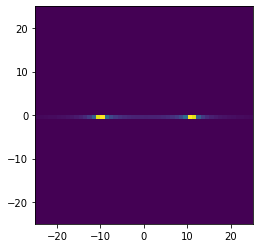

In [4]:
#We zoom a little bit to see the high values of P at the frequencies ±hFreq
plt.imshow(P[hH-25:hH+25,hW-25:hW+25], extent=[-25,25,-25,25]);

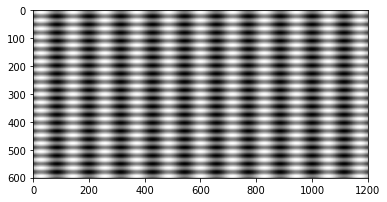

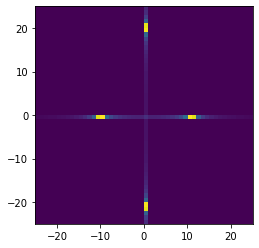

In [5]:
hFreq = 10.5
vFreq = 20.5

A1 = np.sin(hFreq*2*np.pi*X) + np.sin(vFreq*2*np.pi*Y)

plt.figure()
plt.imshow(A1, cmap = 'gray');

F1 = fft2(A1)/(W*H)                          
F1 = fftshift(F1)
P1 = np.abs(F1)

plt.figure()
plt.imshow(P1[hH-25:hH+25,hW-25:hW+25], extent=[-25,25,-25,25]);

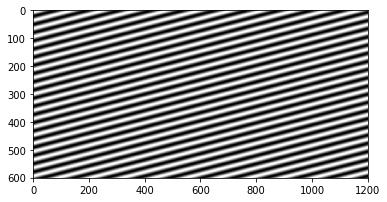

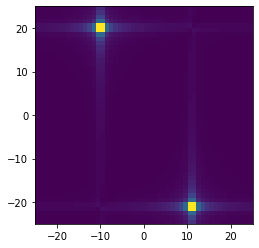

In [6]:
hFreq = 10.5
vFreq = 20.5

A2 = np.sin(hFreq*2*np.pi*X + vFreq*2*np.pi*Y)

plt.figure()
plt.imshow(A2, cmap = 'gray');

F2 = fft2(A2)/(W*H)                          
F2 = fftshift(F2)
P2 = np.abs(F2)

plt.figure()
plt.imshow(P2[hH-25:hH+25,hW-25:hW+25], extent=[-25,25,-25,25]);

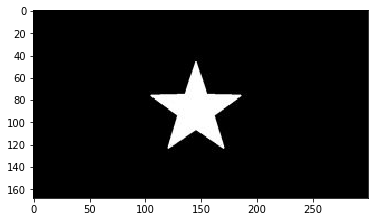

In [8]:
I = Image.open('input1.jpg')
I = I.convert('L')                     # 'L' for gray scale mode
A3 = np.asarray(I, dtype = np.float32)  # Image class instance, I1, to float32 Numpy array, a

H,W = np.shape(A3)
hW = np.fix(0.5*W)
hH = np.fix(0.5*H)

plt.imshow(A3, cmap = 'gray');

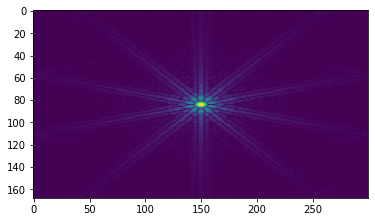

In [9]:
F3 = fft2(A3)/(W*H)                          
F3 = fftshift(F3)
P3 = np.abs(F3)
plt.figure()
plt.imshow(np.log(1+P3))
plt.show()


## Example of Image Compression using 2D FFT Algorithm

An image is recovered from the set of coefficients of 2D DFT by using the inverse Fourier Transform. As we have seen, in general, not all the coefficients have the same value. In order to use only the most important, we may select those that are larger in modulus than some given threshold T.


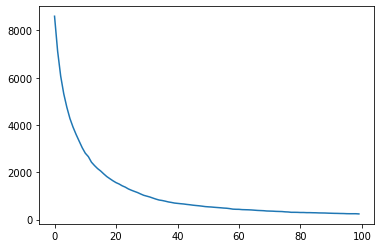

In [10]:
points = 100
Trange = np.linspace(0.05,1,points)
g = np.zeros(points, dtype = 'float32')
n = 0
for T in Trange:
    g[n] = np.count_nonzero(P3 >= T)
    n += 1   
    
plt.plot(g);

Now we perform a thresholding, i.e., set to zero all the coefficients which are smaller than a fixed T


How do we choose T? To start with, T must be large enough, to neglect some coefficients,T must be small enough, to keep some coefficients.
We take, for instance T=0.2 and look at the result

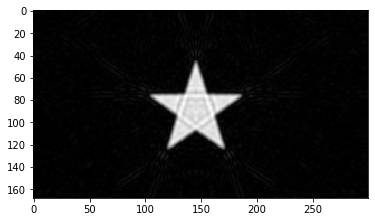

In [11]:
T = 0.2
c = F3 * (P3 >= T)
fM = ifft2(c)*W*H
plt.imshow(np.abs(fM), cmap = 'gray');

We, finally, compute the ratio between the number of nonzero coefficients of the 2D Discrete Fourier transform, F, and that of the thresholded matrix c. This is a kind of compression ratio:


In [12]:
# computing compression ratio(CR)
out1 = np.count_nonzero(F3)
out2 = np.count_nonzero(c)
CR = out1/out2
print(CR)

25.570776255707763


## Example of Vehicle orientation using 2D FFT Algorithm

In this application, we have a vehicle that we want to orientate to follow vertical lines. First, we retake the original image A and rotate it:


600 300
601 1201


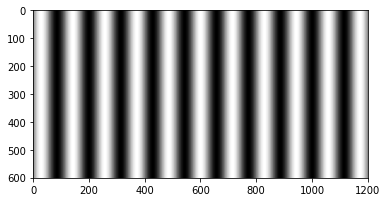

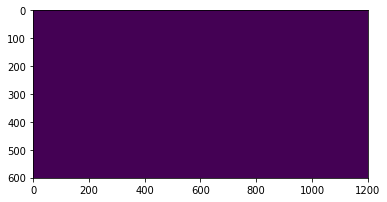

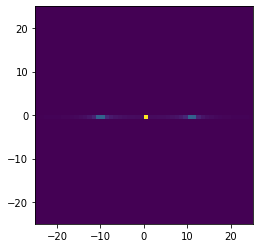

In [13]:
import numpy as np                          # Numerical Python 
import matplotlib.pyplot as plt             # Python plotting
from PIL import Image                       # Python Imaging Library
import matplotlib.image as image
from numpy.fft import fft2, fftshift, ifft2 # Python DFT
# Show plots in the notebook (don't use it in Python scripts)
%matplotlib inline 

hW, hH = 600, 300
hFreq = 10.5

# Mesh on the square [0,1)x[0,1)
x = np.linspace( 0, 2*hW/(2*hW +1), 2*hW+1)     # columns (Width)
y = np.linspace( 0, 2*hH/(2*hH +1), 2*hH+1)     # rows (Height)

[X,Y] = np.meshgrid(x,y)
A = np.sin(hFreq*2*np.pi*X)


A4 = 0.5*(1+ A)                           # normalize to [0,1]
I = Image.fromarray(np.uint8(A4*255))     # to PIL image

# No Rotation
rot_angle = 0
B = I.rotate(rot_angle, expand = True)   # rotate without cropping

B4=np.asarray(B,dtype=np.float32)
sY,sX = np.shape(B4)
cX = int (np.round(np.fix(sX/2)))                         # middle point of the image
cY = int(np.round(np.fix(sY/2)))
print(cX,cY)
plt.figure(1)
plt.imshow(B,cmap = 'gray');

F4 = fft2(B4)/(sX*sY)
F4 = fftshift(F4)
P4 = np.abs(F4)
H,W = np.shape(P4)
print(H,W)
plt.figure(2)
plt.imshow(np.log(1+P4))
plt.show()
plt.figure(3)
plt.imshow(P4[cY-25:cY+25,cX-25:cX+25], extent=[-25,25,-25,25]);
plt.show()


526 671
1343 1053


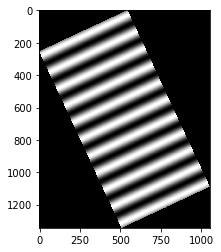

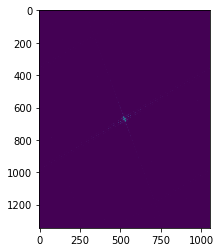

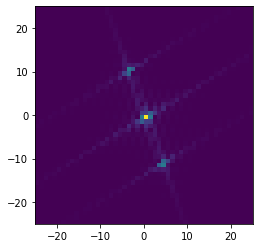

In [14]:
import numpy as np                          # Numerical Python 
import matplotlib.pyplot as plt             # Python plotting
from PIL import Image                       # Python Imaging Library
import matplotlib.image as image
from numpy.fft import fft2, fftshift, ifft2 # Python DFT
# Show plots in the notebook (don't use it in Python scripts)
%matplotlib inline 

hW, hH = 600, 300
hFreq = 10.5

# Mesh on the square [0,1)x[0,1)
x = np.linspace( 0, 2*hW/(2*hW +1), 2*hW+1)     # columns (Width)
y = np.linspace( 0, 2*hH/(2*hH +1), 2*hH+1)     # rows (Height)

[X,Y] = np.meshgrid(x,y)
A = np.sin(hFreq*2*np.pi*X)


A4 = 0.5*(1+ A)                           # normalize to [0,1]
I = Image.fromarray(np.uint8(A4*255))     # to PIL image

# Rotation 
rot_angle =-65
B = I.rotate(rot_angle, expand = True)   # rotate without cropping

B4=np.asarray(B,dtype=np.float32)
sY,sX = np.shape(B4)
cX = int (np.round(np.fix(sX/2)))                         # middle point of the image
cY = int(np.round(np.fix(sY/2)))
print(cX,cY)
plt.figure(1)
plt.imshow(B,cmap = 'gray');

F4 = fft2(B4)/(sX*sY)
F4 = fftshift(F4)
P4 = np.abs(F4)
H,W = np.shape(P4)
print(H,W)
plt.figure(2)
plt.imshow(np.log(1+P4))
plt.show()
plt.figure(3)
plt.imshow(P4[cY-25:cY+25,cX-25:cX+25], extent=[-25,25,-25,25]);
plt.show()

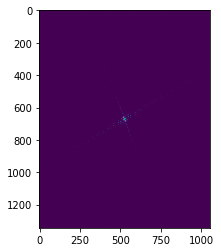

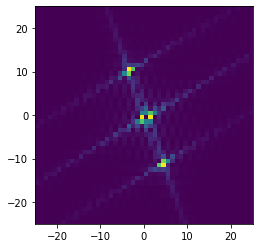

In [15]:

F4 = fft2(B4-B4.mean())/(sX*sY)
F4 = fftshift(F4)
P4 = np.abs(F4)
plt.figure()
plt.imshow(np.log(1+np.abs(F4)))
plt.show()
plt.imshow(P4[cY-25:cY+25,cX-25:cX+25], extent=[-25,25,-25,25]);
plt.show()


## Example of image translation

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html


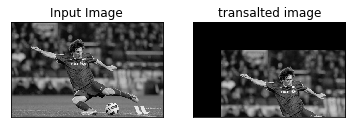

In [17]:
import cv2

I = cv2.imread('messi5.jpg',0)
import numpy as np

# define function
def translation_img(src_img,shift_distance,shape_of_out_img):
    h,w = src_img.shape[:2]
    x_distance = shift_distance[0]
    y_distance = shift_distance[1]
    ts_mat = np.array([[1,0,x_distance],[0,1,y_distance]])
    
    out_img = np.zeros(shape_of_out_img,dtype='u1')
    
    for i in range(h):
        for j in range(w):
            origin_x = j
            origin_y = i
            origin_xy = np.array([origin_x,origin_y,1])
            
            new_xy = np.dot(ts_mat,origin_xy)
            new_x = new_xy[0]
            new_y = new_xy[1]

            if 0<new_x < w and 0<new_y < h:
                out_img[new_y,new_x]  = src_img[i,j]
    return out_img

# calling funcion
img = cv2.imread('messi5.jpg',0)
shift_distance=[100,100]
sifted_img= translation_img(img,shift_distance,img.shape)
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(sifted_img, cmap = 'gray')
plt.title('transalted image'), plt.xticks([]), plt.yticks([])
plt.show()

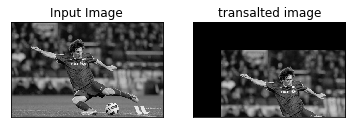

In [18]:
# Fast approch of translation
import numpy

def speedUp_translation_img2(src_img,shift_distance,shape_of_out_img):
    h,w = src_img.shape[:2]
    x_distance = shift_distance[0]
    y_distance = shift_distance[1]
    ts_mat = np.array([[1,0,x_distance],[0,1,y_distance]])
    
    out_img = np.zeros(shape_of_out_img,dtype='u1')
    
    origin_x = 0
    origin_y = 0
    origin_xy = np.array([origin_x,origin_y,1])
    
    new_xy = np.dot(ts_mat,origin_xy)
    new_x = new_xy[0]
    new_y = new_xy[1]
    
    if 0 < new_x < w and 0 < new_y < h:
        out_img[new_y:,new_x:]  = src_img[origin_y:h-new_y,origin_x:w-new_x]
    elif new_x < 0 and new_y >= 0:
        out_img[new_y:,:new_x] = src_img[origin_y:h-new_y,:new_x]
    elif new_y < 0 and new_x >=0:
        out_img[:new_y,new_x:] = src_img[origin_y:new_y,origin_x:w-new_x]
    elif new_y <  0 and new_x <0:
        out_img[:new_y,:new_x] = src_img[origin_y:new_y,:new_x]

    return out_img
# calling funcion
img = cv2.imread('messi5.jpg',0)
shift_distance=[100,100]
sifted_img= speedUp_translation_img2(img,shift_distance,img.shape)
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(sifted_img, cmap = 'gray')
plt.title('transalted image'), plt.xticks([]), plt.yticks([])
plt.show()

## Example of image rotation

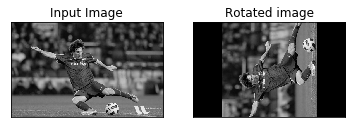

In [19]:
import numpy as np

def Rotation_img(src_img,angle_of_rotation):
    rotation_mat = np.array([[round(np.cos(angle_of_rotation)),round(-np.sin(angle_of_rotation))],
                            [round(np.sin(angle_of_rotation)),round(np.cos(angle_of_rotation))]])
    h,w = src_img.shape[:2]
    x_center =  w//2
    y_center = h//2
    
    new_img = np.zeros(src_img.shape,dtype='u1')
    
    for i in range(h):
        for j in range(w):
            # because rotating use r distance from center of rotate
            # you have to find r from current x,y position
            #carefully if you want direction of rotate anticlockwise use x_center - j not(j - x_center image will transform clockwise direction) 
            #carefully if you want direction of rotate anticlockwise use y_center - i not(i - y_center image will transform clockwise direction) 
            xy_mat = np.array([x_center - j,y_center - i])
            rotate_mat = np.dot(rotation_mat,xy_mat)

            new_x = x_center+ int(rotate_mat[0])
            new_y =  y_center +int(rotate_mat[1])
            
            if 0<new_x<w and 0<new_y<h:
                new_img[new_y,new_x] = src_img[i,j]

    return new_img

# calling funcion
img = cv2.imread('messi5.jpg',0)
rotated_img= Rotation_img(img,90)
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(rotated_img, cmap = 'gray')
plt.title('Rotated image'), plt.xticks([]), plt.yticks([])
plt.show()

## 2D DFT Implementation from scratch

50 50


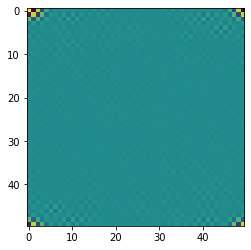

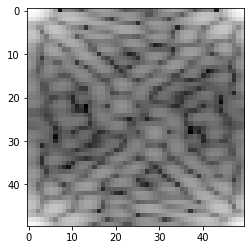

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
import cmath

def DFT2D(image):
    data = np.asarray(image)
    M, N = image.size # (img x, img y)
    dft2d = np.zeros((M,N),dtype=complex)
    for k in range(M):
        for l in range(N):
            sum_matrix = 0.0
            for m in range(M):
                for n in range(N):
                    e = cmath.exp(- 2j * np.pi * ((k * m) / M + (l * n) / N))
                    sum_matrix +=  data[m,n,1] * e
            dft2d[k,l] = sum_matrix
    return dft2d

img = PIL.Image.open("input1.jpg")
img2 = img.resize((50,50))
# plt.imshow(img2, cmap='gray')
plt.imshow(img2, cmap = 'gray');

dft = DFT2D(img2)
plt.imshow(dft.real)

P4 = np.abs(dft)
H,W = np.shape(P4)
print(H,W)
plt.figure()
plt.imshow(20*np.log(1+P4), cmap = 'gray')
plt.show()

## 2D FFT with OpenCV

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html
https://medium.com/@hicraigchen/digital-image-processing-using-fourier-transform-in-python-bcb49424fd82
https://github.com/raoofnaushad/Fourier-Transformation-for-Image-Processing
images source :https://github.com/opencv/opencv/tree/master/samples/data

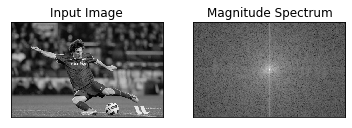

In [21]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('messi5.jpg',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

## 2D Discrete Fourier Transform in OpenCV

OpenCV provides the functions cv2.dft() and cv2.idft() for this. It returns the same result as previous, but with two channels. First channel will have the real part of the result and second channel will have the imaginary part of the result. The input image should be converted to np.float32 first. We will see how to do it.


(Text(0.5, 1.0, 'Magnitude Spectrum of FFT'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

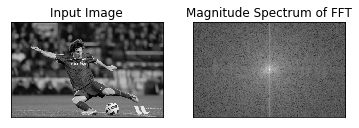

In [22]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('messi5.jpg',0)
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))
#plotting the  image and spectrum
plt.subplot(2, 2, 1), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 2), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum of FFT'), plt.xticks([]), plt.yticks([])

## Reconstruction of Images from DFT

You can also use cv.cartToPolar() which returns both magnitude and phase in a single shot So, now we have to do inverse DFT. In previous session, we created a HPF, this time we will see how to remove high frequency contents in the image, ie we apply LPF to image. It actually blurs the image. For this, we create a mask first with high value (1) at low frequencies, ie we pass the LF content, and 0 at HF region.


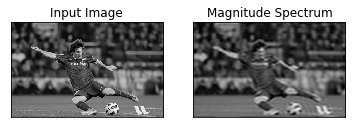

In [23]:
rows, cols = img.shape
crow,ccol = int(rows/2) , int(cols/2)

# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

As usual, OpenCV functions cv2.dft() and cv2.idft() are faster than Numpy counterparts. But Numpy functions are more user-friendly. For more details about performance issues, see below section.


## Performance Optimization of 2D DFT

Performance of DFT calculation is better for some array size. It is fastest when array size is power of two. The arrays whose size is a product of 2’s, 3’s, and 5’s are also processed quite efficiently. So if you are worried about the performance of your code, you can modify the size of the array to any optimal size (by padding zeros) before finding DFT. For OpenCV, you have to manually pad zeros. But for Numpy, you specify the new size of FFT calculation, and it will automatically pad zeros for you.

So how do we find this optimal size ? OpenCV provides a function, cv.getOptimalDFTSize() for this. It is applicable to both cv.dft() and np.fft.fft2(). Let's check their performance using IPython magic command timeit.


In [24]:
img = cv2.imread('messi5.jpg',0)
rows,cols = img.shape
print(rows,cols)
nrows = cv2.getOptimalDFTSize(rows)
ncols = cv2.getOptimalDFTSize(cols)
print(nrows,ncols)

342 548
360 576


See, the size (342,548) is modified to (360, 576). Now let's pad it with zeros (for OpenCV) and find their DFT calculation performance. You can do it by creating a new big zero array and copy the data to it, or use cv.copyMakeBorder().


In [26]:

nimg = np.zeros((nrows,ncols))
nimg[:rows,:cols] = img

# Now we calculate the DFT performance comparison of Numpy function: 
%timeit fft1 = np.fft.fft2(img)
%timeit fft2 = np.fft.fft2(img,[nrows,ncols])

28.6 ms ± 503 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
8.35 ms ± 136 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [29]:

%timeit dft1= cv2.dft(np.float32(img),flags=cv2.DFT_COMPLEX_OUTPUT)

%timeit dft2= cv2.dft(np.float32(nimg),flags=cv2.DFT_COMPLEX_OUTPUT)

18 ms ± 549 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.86 ms ± 192 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Reconstruction of orginal image using Numpy 2D IFFT algorithm


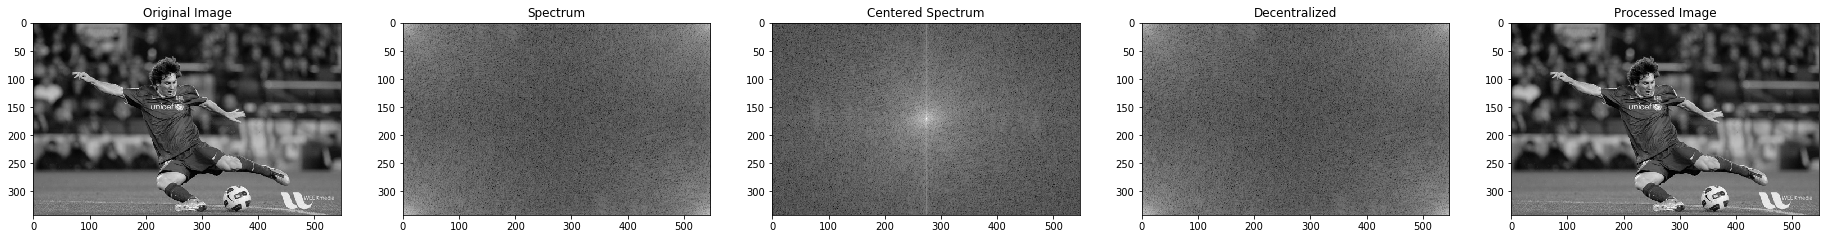

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

img_c1 = cv2.imread('messi5.jpg',0)
img_c2 = np.fft.fft2(img_c1)
img_c3 = np.fft.fftshift(img_c2)
img_c4 = np.fft.ifftshift(img_c3)
img_c5 = np.fft.ifft2(img_c4)

plt.subplot(151), plt.imshow(img_c1, "gray"), plt.title("Original Image")
plt.subplot(152), plt.imshow(np.log(1+np.abs(img_c2)), "gray"), plt.title("Spectrum")
plt.subplot(153), plt.imshow(np.log(1+np.abs(img_c3)), "gray"), plt.title("Centered Spectrum")
plt.subplot(154), plt.imshow(np.log(1+np.abs(img_c4)), "gray"), plt.title("Decentralized")
plt.subplot(155), plt.imshow(np.abs(img_c5), "gray"), plt.title("Processed Image")

plt.show()

## Mangnitude and Phase Spectrum using 2D FFT algorithm

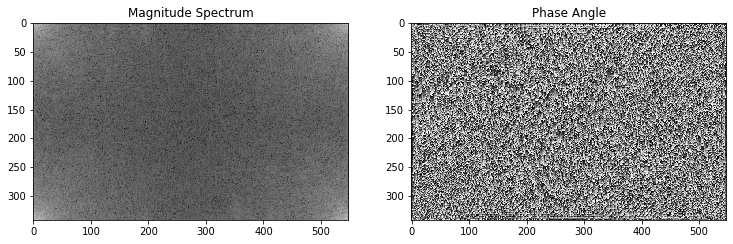

In [31]:

plt.figure(figsize=(6.4*3, 4.8*3), constrained_layout=False)

img = cv2.imread('messi5.jpg',0)

original = np.fft.fft2(img)
plt.subplot(131), plt.imshow(np.log(np.abs(original)), "gray"), plt.title("Magnitude Spectrum")

plt.subplot(132), plt.imshow(np.angle(original), "gray"), plt.title("Phase Angle")
plt.show()

2D FFT with Scipy

http://scipy-lectures.org/intro/scipy/auto_examples/solutions/plot_fft_image_denoise.html

## 2D FFT for image denoising


Text(0.5, 1.0, 'Original image')

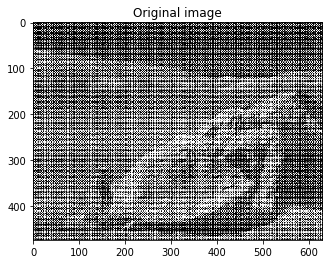

In [34]:
# Step 1: Import library and input image

import numpy as np
import matplotlib.pyplot as plt

im = plt.imread('moonlanding.png').astype(float)

plt.figure()
plt.imshow(im, plt.cm.gray)
plt.title('Original image')

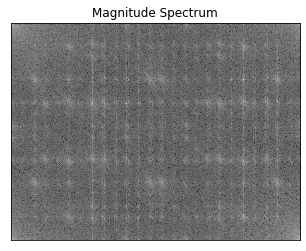

In [38]:
# Step 2: Compute the 2d FFT of the input image

from scipy import fftpack
im_fft = fftpack.fft2(im)

def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm
    # A logarithmic colormap
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()
    
# Show the results
magnitude_spectrum = np.log(np.abs(im_fft))
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

Text(0.5, 1.0, 'Filtered Spectrum')

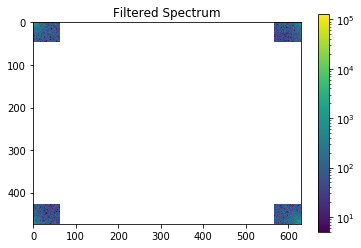

In [39]:
# Step 3: Filter in FFT

# In the lines following, we'll make a copy of the original spectrum and
# truncate coefficients.

# Define the fraction of coefficients (in each direction) we keep
keep_fraction = 0.1

# Call ff a copy of the original transform. Numpy arrays have a copy
# method for this purpose.
im_fft2 = im_fft.copy()

# Set r and c to be the number of rows and columns of the array.
r, c = im_fft2.shape

# Set to zero all rows with indices between r*keep_fraction and
# r*(1-keep_fraction):
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0

# Similarly with the columns:
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

plt.figure()
plot_spectrum(im_fft2)
plt.title('Filtered Spectrum')

Text(0.5, 1.0, 'Reconstructed Image')

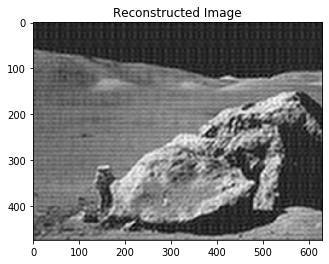

In [40]:
# Step 4: Reconstruct the final image

# Reconstruct the denoised image from the filtered spectrum, keep only the
# real part for display.
im_new = fftpack.ifft2(im_fft2).real

plt.figure()
plt.imshow(im_new, plt.cm.gray)
plt.title('Reconstructed Image')

## Easier and better: scipy.ndimage.gaussian_filter()

Implementing filtering directly with FFTs is tricky and time consuming. We can use the Gaussian filter from scipy.ndimage


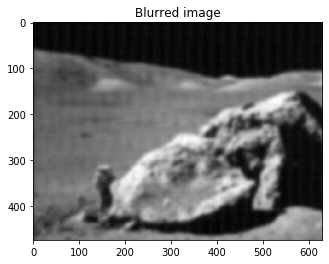

In [37]:
from scipy import ndimage
im_blur = ndimage.gaussian_filter(im, 4)

plt.figure()
plt.imshow(im_blur, plt.cm.gray)
plt.title('Blurred image')

plt.show()